# Moving Average Methods

Simple Moving Average:
1. It is an average of the value of the specific period.
2. Smaller the value of K, the greater weight is given to each period.
3. Greater the value of K, the smaller weight is given to each period.
4. SMA = p1+p2+p3+p4+p5 / number of p

Weighted Moving Average:
1. Assign a heavier weighting to more current data points since they are more relevant than data points in the distant past.
2. The sum of the weighting should add up to 1 (or 100 percent). 
3. The weightings are equally distributed.
4. Higher the weight associated with the recent terms, quicker the response to the change in time series happen to the      
   forecasted output
5. WMA =  p1*w1 + p2*w2 + p3*w3 + p4*w4 + p5*w5 / Sum of Weights

Exponential Weighted Moving Average:
1. The moving average is designed as such that older observations are given lower weights. 
2. The weights fall exponentially as the data point gets older – hence the name exponentially weighted.
3. Exponentially Moving Average = Alpha*Current X + (1-Alpa)*Previous Exponential Moving Avrage
4. The only decision a user of the EWMA must make is the parameter alpha. 
5. The parameter decides how important the current observation is in the calculation of the EWMA. 
6. The higher the value of alpha, the more closely the EWMA tracks the original time series.

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
#Loading data
data = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/airline_passengers.csv',
                  index_col='Month',
                  parse_dates=True)

In [73]:
#Checking data
data.head()

,Thousands of Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [74]:
#Checking missing values
data.isna().sum()

Thousands of Passengers    0
dtype: int64

# Simple Moving Average

## SMA = Period1 + Period2 + Period3 / Number of Periods

In [75]:
#Creating simple moving average
data['6_month_SMA'] = data['Thousands of Passengers'].rolling(window=6).mean()
data['12_month_SMA'] = data['Thousands of Passengers'].rolling(window=12).mean()

In [76]:
#Checking data
data.head(10)

,Thousands of Passengers,6_month_SMA,12_month_SMA
Month,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,NaN,NaN
1949-03-01,132,NaN,NaN
1949-04-01,129,NaN,NaN
1949-05-01,121,NaN,NaN
1949-06-01,135,124.500000,NaN
1949-07-01,148,130.500000,NaN
1949-08-01,148,135.500000,NaN
1949-09-01,136,136.166667,NaN


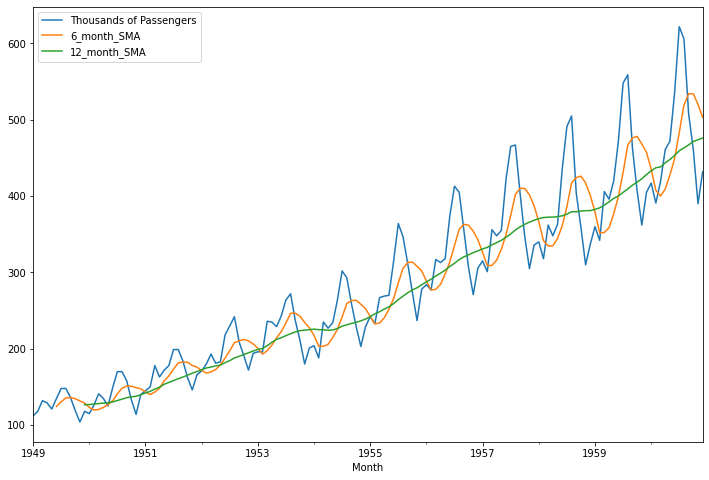

In [77]:
#Plotting the data
data.plot(figsize = (12,8));

Observatins:
1. Less value of k period, less smoothning data
2. More value of k period, more smoothing data

# Weighted Moving Average

## WMA = Period1*w1 + Period2*w2 + Periof3*w3 / Sum of Weights

In [2]:
#Loading data
data = pd.read_csv('C:/Users/bhavi/OneDrive/Desktop/Data/Time_Series_Data/airline_passengers.csv',
                  index_col='Month',
                  parse_dates=True)

In [93]:
#Computing weighted moving average
def wma(arr, period):
    kernel = np.arange(period, 0, -1)
    kernel = np.concatenate([np.zeros(period - 1), kernel / kernel.sum()])
    return np.convolve(arr, kernel, 'same')
data['wma_3'] = wma(data['Thousands of Passengers'], 3)
data['wma_6'] = wma(data['Thousands of Passengers'], 6)
data['wma_12'] = wma(data['Thousands of Passengers'], 12)
data['wma_24'] = wma(data['Thousands of Passengers'], 24)

In [79]:
#Another way to compute Weighted Moving Average
# data['Lag1'] = data['Thousands of Passengers'].shift(1)
# data['Lag2'] = data['Thousands of Passengers'].shift(2)
# data['Lag3'] = data['Thousands of Passengers'].shift(3)
# data.fillna(0,inplace=True)
# data['WME'] = ((data['Lag1']*3) + (data['Lag2']*2) + (data['Lag3']*1))/6

In [94]:
#Checking the data
data

,Thousands of Passengers,wma_3,wma_6,wma_12,wma_24
Month,,,,,
1949-01-01,112,56.000000,32.000000,17.230769,8.960000
1949-02-01,118,96.333333,60.380952,33.948718,18.026667
1949-03-01,132,124.000000,87.142857,51.307692,27.820000
1949-04-01,129,128.166667,106.761905,66.512821,36.933333
1949-05-01,121,125.500000,117.952381,78.833333,44.976667
...,...,...,...,...,...
1960-08-01,606,599.500000,554.428571,496.756410,466.550000
1960-09-01,508,559.666667,551.238095,503.628205,472.280000
1960-10-01,461,500.833333,530.380952,502.692308,473.903333


<AxesSubplot:xlabel='Month'>

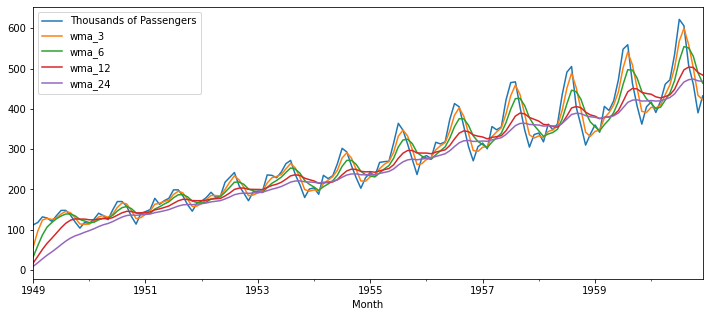

In [96]:
#Plotting the data
data.plot(figsize = (12,5));

#Observation:
1. More the k period, More the data moved toward smoothing.

# Exponentially Weighted Moving Average

## EWMA = Current Value*alpha + (1-alpha)+Previous Exponential Weighted Moving Average

In [17]:
#Creating Exponential Weighted Moving Average
data['EWMA_2'] = data['Thousands of Passengers'].ewm(span=2).mean()
data['EWMA_12'] = data['Thousands of Passengers'].ewm(span=12).mean()

In [18]:
#Checking data
data.head(20)

,Thousands of Passengers,6_month_SMA,12_month_SMA,EWMA_2,EWMA_12
Month,,,,,
1949-01-01,112,NaN,NaN,112.000000,112.000000
1949-02-01,118,NaN,NaN,116.500000,115.250000
1949-03-01,132,NaN,NaN,127.230769,121.787529
1949-04-01,129,NaN,NaN,128.425000,124.064224
1949-05-01,121,NaN,NaN,123.454545,123.231685
1949-06-01,135,124.500000,NaN,131.162088,126.092005
1949-07-01,148,130.500000,NaN,142.392498,130.980697
1949-08-01,148,135.500000,NaN,146.131402,134.532364
1949-09-01,136,136.166667,NaN,139.376791,134.822714


In [19]:
#Extracting column names
var = data.columns

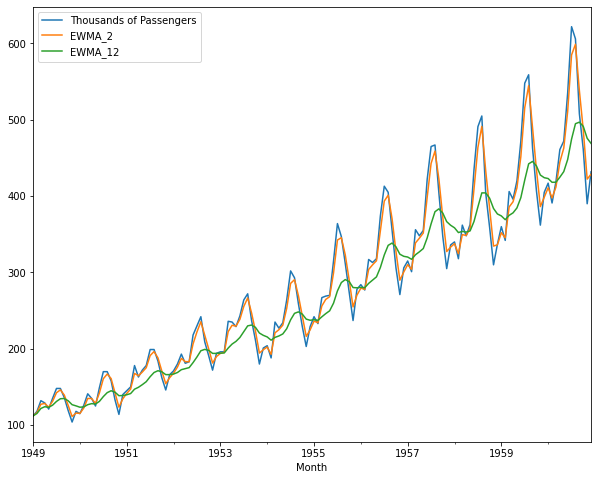

In [20]:
#Creating plot
data[['Thousands of Passengers','EWMA_2','EWMA_12']].plot(figsize = (10,8));

More the value of span, more smothing the data